<a href="https://colab.research.google.com/github/hamxathirr/COVID-19-Analysis-Visualization-Prediction/blob/master/covid_19_Analysis_visualization_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # COVID-19 Analysis ,visualization & Prediction

In [0]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [0]:
#Reading Data
data=pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv' ,parse_dates=['Last Update'])
data.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

#Earliest Cases
data.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [0]:
data.shape

(9735, 8)

In [0]:
#Missing Values
data.isnull().sum().to_frame('nulls')

,nulls
SNo,0
Date,0
Province/State,4433
Country,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


# Total Confirmed , Deaths and Recovered cases in the world 28/03/2020

In [0]:
df = data.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
sorted_By_Confirmed=df.sort_values('Confirmed',ascending=False)
sorted_By_Confirmed=sorted_By_Confirmed.drop_duplicates('Country')

world_Confirmed_Total=sorted_By_Confirmed['Confirmed'].sum()
world_Deaths_Total=sorted_By_Confirmed['Deaths'].sum()
world_Recovered_Total=sorted_By_Confirmed['Recovered'].sum()

Active=world_Confirmed_Total-world_Deaths_Total-world_Recovered_Total

world_Deaths_rate=(world_Deaths_Total*100)/world_Confirmed_Total
world_Recovered_rate=(world_Recovered_Total*100)/world_Confirmed_Total

China=sorted_By_Confirmed[sorted_By_Confirmed['Country']=='Mainland China']
China_Recovered_rate=(int(China['Recovered'].values)*100)/int(China['Confirmed'].values)


veri={'Total Confirmed cases  in the world':world_Confirmed_Total,'Total Deaths cases in the world':world_Deaths_Total,'Total Recovered cases in the world':world_Recovered_Total,'Total Active Cases':Active,'Rate of Recovered Cases %':world_Recovered_rate,'Rate of Deaths Cases %':world_Deaths_rate,'Rate of Recovered China cases %':China_Recovered_rate}
veri=pd.DataFrame.from_dict(veri, orient='index' ,columns=['Total'])
print("28/03/2020") 
veri.style.background_gradient(cmap='Greens')

28/03/2020


,Total
Total Confirmed cases in the world,661693
Total Deaths cases in the world,30660
Total Recovered cases in the world,139732
Total Active Cases,491301
Rate of Recovered Cases %,21.1173
Rate of Deaths Cases %,4.63357
Rate of Recovered China cases %,92.1094


# Coron Virus With Numbers

Confirmed --              Cumulative number of confirmed cases till that date <br>
Deaths --               Cumulative number of of deaths till that date <br>
Recovered --              Cumulative number of recovered cases till that date <br>
Active -- Active Cases<br>
Recovered Cases Rate % -- rate of Recovered Cases from total of Confirmed cases in same Country <br>
Deaths Cases Rate % --    rate of death Cases from total of Confirmed cases in same Country <br>
Total Cases Rate % --     rate of total cases from Total cases in the world <br>

In [0]:
Recovered_rate=(sorted_By_Confirmed['Recovered']*100)/sorted_By_Confirmed['Confirmed']
Deaths_rate=(sorted_By_Confirmed['Deaths']*100)/sorted_By_Confirmed['Confirmed']
cases_rate=(sorted_By_Confirmed.Confirmed*100)/world_Confirmed_Total

sorted_By_Confirmed['Active']=sorted_By_Confirmed['Confirmed']-sorted_By_Confirmed['Deaths']-sorted_By_Confirmed['Recovered']
sorted_By_Confirmed['Recovered Cases Rate %']=pd.DataFrame(Recovered_rate)
sorted_By_Confirmed['Deaths Cases Rate %']=pd.DataFrame(Deaths_rate)
sorted_By_Confirmed['Total Cases Rate %']=pd.DataFrame(cases_rate)


print("Sorted By Confirmed Cases")
sorted_By_Confirmed.style.background_gradient(cmap='Reds')


Sorted By Confirmed Cases


,Date,Country,Confirmed,Deaths,Recovered


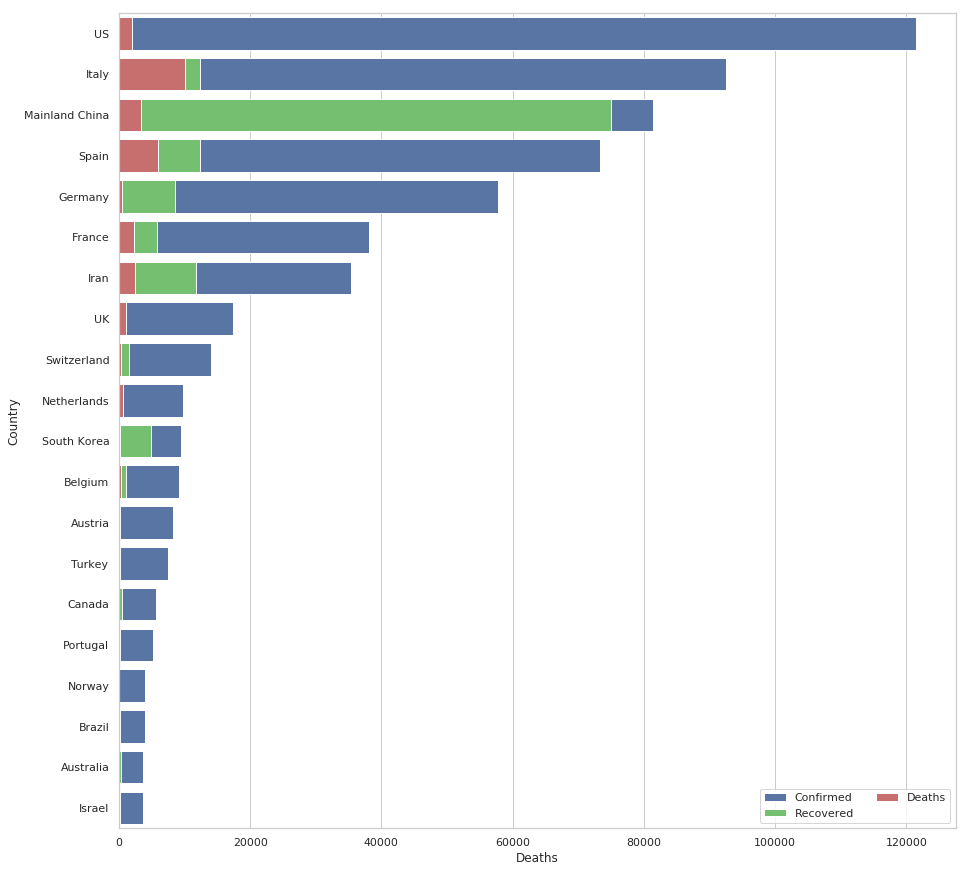

In [0]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,15 ))

sns.barplot(x="Confirmed", y="Country", data=sorted_By_Confirmed.head(20),
            label="Confirmed", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Country", data=sorted_By_Confirmed.head(20),
            label="Recovered", color="g")

sns.set_color_codes("muted")
sns.barplot(x="Deaths", y="Country", data=sorted_By_Confirmed.head(20),
            label="Deaths", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)


## What happened in one day ?  (New cases | New Deaths ) - 03/28/2020
difference between 27/03 and 28/03

In [0]:
df_Difference = data.groupby(["Date", "Country"])[['Date', 'Country', 'Confirmed','Deaths']].sum().reset_index()
sorted_By_Confirmed_Difference=df_Difference.sort_values('Country',ascending=False)

x1=sorted_By_Confirmed_Difference[sorted_By_Confirmed_Difference.Date=='03/28/2020'].reset_index().drop('index',axis=1)
x2=sorted_By_Confirmed_Difference[sorted_By_Confirmed_Difference.Date=='03/27/2020'].reset_index().drop('index',axis=1)

h=pd.merge(x2,x1,on='Country')
h['New Confirmed Cases']=h['Confirmed_y']-h['Confirmed_x']
h['New Deaths ']=h['Deaths_y']-h['Deaths_x']

h1=h.sort_values('New Confirmed Cases',ascending=False).head(50)
h1=h1.drop(['Confirmed_x','Deaths_x','Date_x','Confirmed_y','Deaths_y'],axis=1).style.background_gradient(cmap='Greens')
print("The New Cases in 28/03")
h1

The New Cases in 28/03


,Country,Date_y,New Confirmed Cases,New Deaths
10,US,03/28/2020,19821,445
26,Spain,03/28/2020,7516,844
116,Germany,03/28/2020,6824,91
96,Italy,03/28/2020,5974,889
120,France,03/28/2020,4703,320
100,Iran,03/28/2020,3076,139
11,UK,03/28/2020,2567,260
161,Belgium,03/28/2020,1850,64
12,Turkey,03/28/2020,1704,16
60,Netherlands,03/28/2020,1172,93


# Top 10  infected Countries

Text(0.5, 1.0, 'Total Cases / Deaths / Recovered')

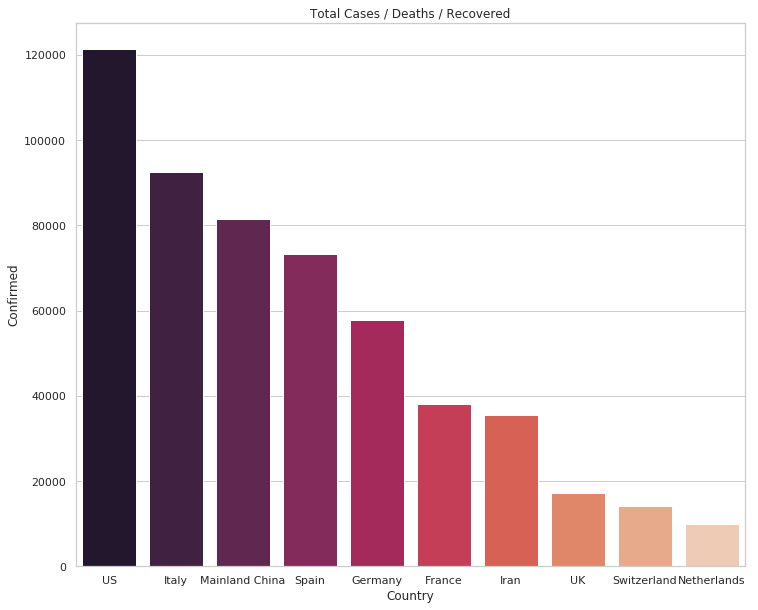

In [0]:
sorted_By_Confirmed1=sorted_By_Confirmed.head(10)
x=sorted_By_Confirmed1.Country
y=sorted_By_Confirmed1.Confirmed
plt.rcParams['figure.figsize'] = (12, 10)
sns.barplot(x,y,order=x ,palette="rocket").set_title('Total Cases / Deaths / Recovered')  #graf çizdir (Most popular)

### Cases Rate per country of total cases in the world 


cases rate per country of total cases in the world 


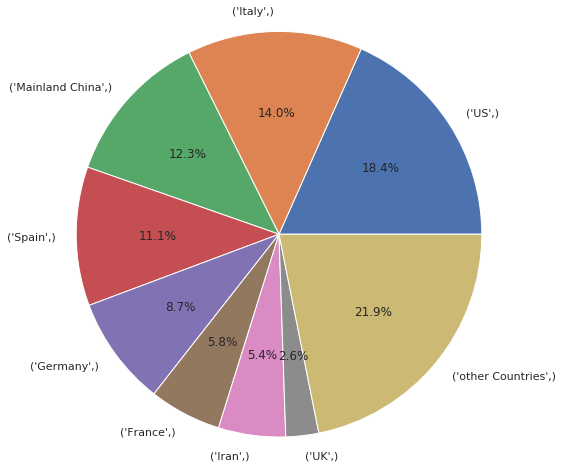

In [0]:
Top7=sorted_By_Confirmed.iloc[0:8,-1].values
others=sorted_By_Confirmed.iloc[8:,-1].sum()
x=np.array(Top7)
x2=np.array(others)
rates=np.concatenate((x, x2), axis=None)

rate_perCountry=pd.DataFrame(data=rates,index=[sorted_By_Confirmed['Country'].head(9)] ,columns=['rate'])
rate_perCountry.rename(index={'Switzerland': "other Countries"},inplace=True)


labels=rate_perCountry.index
sizes=rate_perCountry['rate'].values

explode = None  # explode 1st slice
plt.subplots(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
plt.axis('equal')
print("cases rate per country of total cases in the world ")
plt.show()

## Graphic that illustrates Increasing infections cases per day

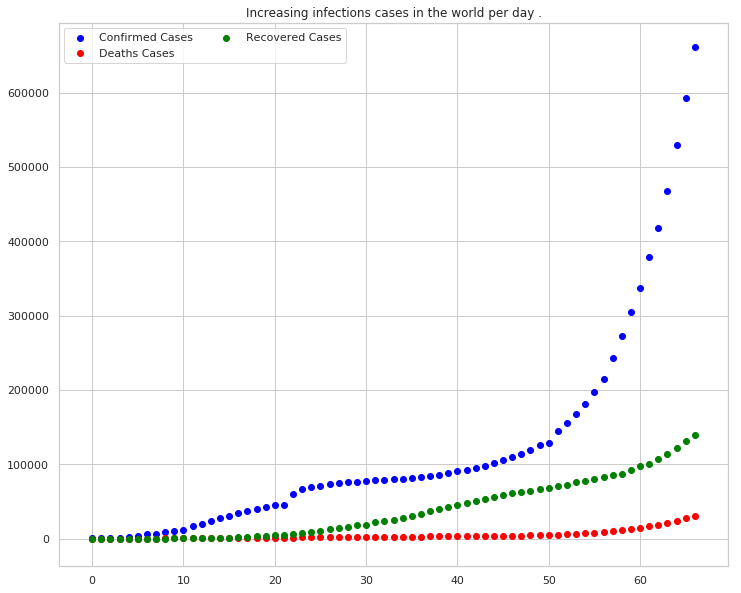

In [0]:
cases_per_Day = data.groupby(["Date"])['Confirmed','Deaths', 'Recovered'].sum().reset_index()
sorted_By_Confirmed1=cases_per_Day.sort_values('Date',ascending=False)

x=cases_per_Day.index

y=cases_per_Day.Confirmed
y1=cases_per_Day.Deaths
y2=cases_per_Day.Recovered

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12,10 ))

plt.scatter(x,y,color='blue' , label='Confirmed Cases')
plt.scatter(x,y1,color='red' ,label="Deaths Cases")
plt.scatter(x,y2,color='green',label="Recovered Cases")
plt.title("Increasing infections cases in the world per day .")
ax.legend(ncol=2, loc='upper left', frameon=True)
plt.show()

## Table that illustrates Increasing infections cases in the world per day .

In [0]:
sorted_By_Confirmed1.style.background_gradient(cmap='Reds')

,Date,Confirmed,Deaths,Recovered
66,03/28/2020,660706,30652,139415
65,03/27/2020,593291,27198,130915
64,03/26/2020,529591,23970,122150
63,03/25/2020,467594,21181,113770
62,03/24/2020,417966,18615,107705
61,03/23/2020,378287,16497,100958
60,03/22/2020,337020,14623,97243
59,03/21/2020,304528,12973,91676
58,03/20/2020,272167,11299,87403
57,03/19/2020,242713,9867,84962


# Prediction Future cases

In [0]:
#Train & Test Data 
x_data=pd.DataFrame(cases_per_Day.index)
y_data=pd.DataFrame(cases_per_Day.Confirmed)


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=0)

# Polynomial Regression to predict future cases .

In [0]:
#Polynomal Regression (degree=5)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x_train)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Graphic  

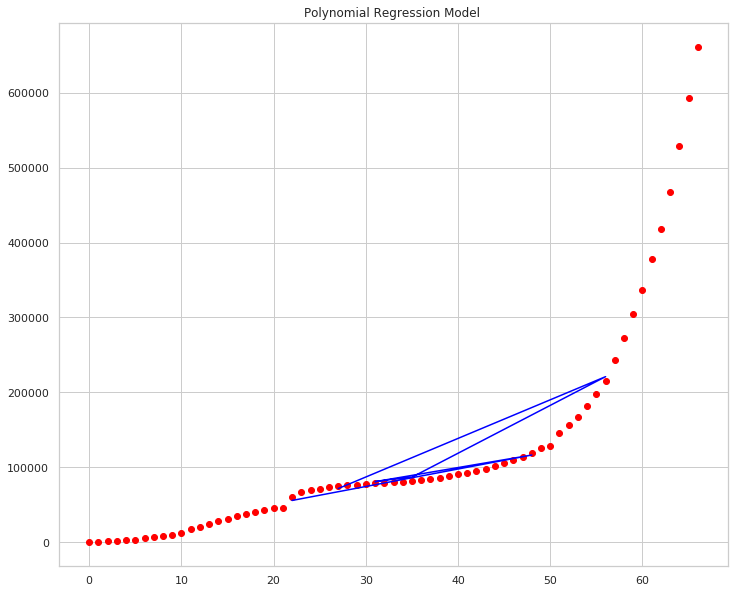

In [0]:
cases_per_Day = data.groupby(["Date"])['Confirmed','Deaths', 'Recovered'].sum().reset_index()
sorted_By_Confirmed1=cases_per_Day.sort_values('Date',ascending=False)

x=cases_per_Day.index

y=cases_per_Day.Confirmed

plt.scatter(x,y,color='red')
plt.plot(x_test,lin_reg2.predict(poly_reg.fit_transform(x_test)),color='blue')
plt.title("Polynomial Regression Model ")
plt.show()

## Test algorithm

In [0]:
y_pred=lin_reg2.predict(poly_reg.fit_transform(x_test))

result=pd.DataFrame(y_pred)
result['Real Value']=y_test.iloc[:,:].values
result['Predicted Value']=pd.DataFrame(y_pred)
result=result[['Real Value','Predicted Value']]
result

,Real Value,Predicted Value
0,75138.0,71373.495305
1,214915.0,220905.820074
2,81397.0,86623.050434
3,79570.0,83968.206875
4,78599.0,80609.800666
5,118582.0,116190.239215
6,60370.0,55494.371490


In [0]:

from sklearn.metrics import r2_score

print('Polynomial Regession  R2 Score   : ',r2_score(y_test, y_pred))

Polynomial Regession  R2 Score   :  0.9923156337882921


# Make Predict For Future Days

In [0]:
#today is 03/28/2020
print("After {0} day will be {1} case in the world".format((70-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[70]]))))
print("After {0} day will be {1} case in the world".format((77-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[77]]))))
print("After {0} day will be {1} case in the world".format((87-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[87]]))))
print("After {0} day will be {1} case in the world".format((97-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[97]]))))
print("After {0} day will be {1} case in the world".format((107-len(cases_per_Day)),lin_reg2.predict(poly_reg.fit_transform([[107]]))))

After 3 day will be [[1004480.22963889]] case in the world
After 10 day will be [[1990163.08545086]] case in the world
After 20 day will be [[4657440.84541079]] case in the world
After 30 day will be [[9640372.30909518]] case in the world
After 40 day will be [[18156842.98343593]] case in the world


 If you like my Kernel,vote it please ... Thanks